<b>Описание проекта</b>

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. 

<b>Задачи исследования</b>
1) Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

2) В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

3) Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

<b>План исследования</b>
1) Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

2) Нужно собрать данные по клиентам по следующим группам:
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

<b>Описание данных</b>

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. (market_file.csv)
- <b>id</b> — номер покупателя в корпоративной базе данных.
- <b>Покупательская активность</b> — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- <b>Тип сервиса</b> — уровень сервиса, например «премиум» и «стандарт».
- <b>Разрешить сообщать</b> — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- <b>Маркет_актив_6_мес</b> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- <b>Маркет_актив_тек_мес</b> — количество маркетинговых коммуникаций в текущем месяце.
- <b>Длительность </b>— значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- <b>Акционные_покупки</b> — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- <b>Популярная_категория</b> — самая популярная категория товаров у покупателя за последние 6 месяцев.
- <b>Средний_просмотр_категорий_за_визит</b> — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- <b>Неоплаченные_продукты_штук_квартал</b> — общее число неоплаченных товаров в корзине за последние 3 месяца.
- <b>Ошибка_сервиса</b> — число сбоев, которые коснулись покупателя во время посещения сайта.
- <b>Страниц_за_визит</b> — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. (market_money.csv)
- <b>id</b> — номер покупателя в корпоративной базе данных.
- <b>Период</b> — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- <b>Выручка</b> — сумма выручки за период. 

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода. (market_time.csv)
- <b>id </b> — номер покупателя в корпоративной базе данных.
- <b>Период </b> — название периода, во время которого зафиксировано общее время.
- <b>минут </b> — значение времени, проведённого на сайте, в минутах.

Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. (money.csv)
- <b>id </b> — номер покупателя в корпоративной базе данных.
- <b>Прибыль </b> — значение прибыли.

<b>Шаг 1. Загрузка данных<b/>

In [1]:
!pip install imbalanced-learn

     |████████████████████████████████| 258 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 13.5 MB 46.5 MB/s eta 0:00:01
     |████████████████████████████████| 308 kB 68.6 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
!pip install shap

     |████████████████████████████████| 997 kB 2.4 MB/s eta 0:00:01


In [3]:
!pip install phik

     |████████████████████████████████| 677 kB 2.0 MB/s eta 0:00:01


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler,  MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, classification_report, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_is_fitted
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import permutation_importance
from packaging import version
import phik
import shap

In [5]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', header=0, decimal=',')

In [6]:
def pretty_display(df, title="Таблица"):
    styled_df = df.head(5).style \
        .set_table_styles(
            [{'selector': 'th', 'props': [('text-align', 'center')]}]
        ) \
        .set_properties(**{'text-align': 'center'}) \
        .highlight_null(null_color='lightgray') \
        .set_caption(title)
    
    display(styled_df)
    
pretty_display(market_file, "Первые 5 строк таблицы market_file")
pretty_display(market_money, "Первые 5 строк таблицы market_money")
pretty_display(market_time, "Первые 5 строк таблицы market_time")
pretty_display(money, "Первые 5 строк таблицы money")

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.400000,5,121,0.000000,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.400000,4,819,0.750000,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.900000,3,539,0.140000,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.200000,5,896,0.990000,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.100000,3,1064,0.940000,Товары для детей,3,2,3,2


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.000000
1,215348,текущий_месяц,3293.100000
2,215348,предыдущий_месяц,0.000000
3,215349,препредыдущий_месяц,4472.000000
4,215349,текущий_месяц,4971.600000


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,Прибыль
0,215348,0.980000
1,215349,4.160000
2,215350,3.130000
3,215351,4.870000
4,215352,4.210000


Выведены первые 5 строк четырех файлов, для первичного анализа.

<b>Шаг 2. Предобработка данных</b>

<b>Проверка файлов на наличие дубликатов</b>

In [7]:
def check_duplicates(df, name):
    dup_count = df.duplicated().sum()
    print(f"В {name}: {dup_count} дубликатов")
    if dup_count > 0:
        print(df[df.duplicated()].head())
    print('-' * 50)

In [8]:
market_file_missing_values = market_file.isnull().sum()
market_file_missing_values = market_file_missing_values[market_file_missing_values > 0].sort_values(ascending=False)
market_file_missing_values
check_duplicates(market_file, "market_file")
market_file = market_file.drop_duplicates().reset_index(drop=True)

В market_file: 0 дубликатов
--------------------------------------------------


In [9]:
market_money_missing_values = market_money.isnull().sum()
market_money_missing_values = market_money_missing_values[market_money_missing_values > 0].sort_values(ascending=False)
market_money_missing_values
check_duplicates(market_money, "market_money")
market_money = market_money.drop_duplicates().reset_index(drop=True)

В market_money: 0 дубликатов
--------------------------------------------------


In [10]:
market_time_missing_values = market_time.isnull().sum()
market_time_missing_values = market_time_missing_values[market_time_missing_values > 0].sort_values(ascending=False)
market_time_missing_values
check_duplicates(market_time, "market_time")
market_time = market_time.drop_duplicates().reset_index(drop=True)

В market_time: 0 дубликатов
--------------------------------------------------


In [11]:
money_missing_values = money.isnull().sum()
money_missing_values = money_missing_values[money_missing_values > 0].sort_values(ascending=False)
money_missing_values
check_duplicates(money, "money")
money = money.drop_duplicates().reset_index(drop=True)

В money: 0 дубликатов
--------------------------------------------------


Проверка на наличие дубликатов показало что все 4 файла не имеют явных дубликатов и пропусков.

<b>Исправление ошибок в файле</b>

In [12]:
display(market_money['Период'].unique())
display(market_time['Период'].unique())

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [13]:
market_time['Период'].replace({'предыдцщий_месяц': 'предыдущий_месяц'}, inplace=True)
display(market_time['Период'].unique())

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Исправлена ошибка в файле market_time в столбце "Период". Данная мера нужна для корректной настройки МО. Пропуски не были обнаружены. Данные не требуют обработки.

<b>Проверка на неявные дубликаты</b>

In [14]:
print(market_file['Покупательская активность'].unique())
print(market_file['Тип сервиса'].unique())
print(market_file['Популярная_категория'].unique())
print(market_file['Разрешить сообщать'].unique())

['Снизилась' 'Прежний уровень']
['премиум' 'стандартт' 'стандарт']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
['да' 'нет']


In [15]:
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')
market_file['Популярная_категория'] = market_file['Популярная_категория'].apply(lambda x : x.replace('аксесуары', 'аксессуары'))
print(market_file['Тип сервиса'].unique())
print(market_file['Популярная_категория'].unique())

['премиум' 'стандарт']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксессуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


Был проведен анализ значений в категориальных столбцах, исправлены ошибки орфографии.

<b>Приведение названий в единый формат</b>

In [16]:
market_file.rename(columns={"Покупательская активность": "Покупательская_активность", 
                            "Тип сервиса": "Тип_сервиса", "Разрешить сообщать": "Разрешить_сообщать"}, inplace=True)

<b>Приведение типов</b>

In [17]:
market_file.info()
print('------------------')
market_money.info()
print('------------------')
market_time.info()
print('------------------')
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская_активность            1300 non-null   object 
 2   Тип_сервиса                          1300 non-null   object 
 3   Разрешить_сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

Типы данных в столбцах не требует корректировки.

<b>Шаг 3. Исследовательский анализ данных</b>

- Для удаления выбросов и корректной настройки модели МО требуется провести исследовательский анализ количественных и категориальных признаков. 

In [18]:
display(market_file.describe())

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


In [19]:
def plot_countplots(df, columns, figsize=(8, 4)):
    for col in columns:
        plt.figure(figsize=figsize)
        sns.countplot(x=df[col])
        plt.xlabel(f'Показатель по признаку [{col}]')
        plt.title(f'Распределение значений признака: {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


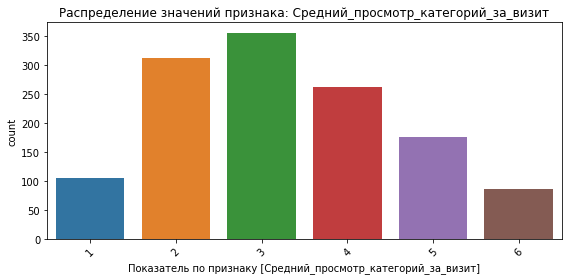

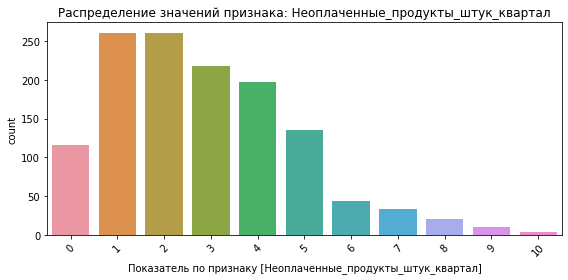

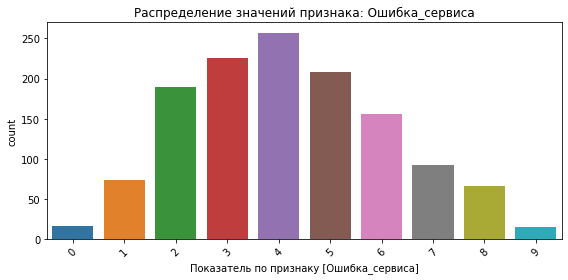

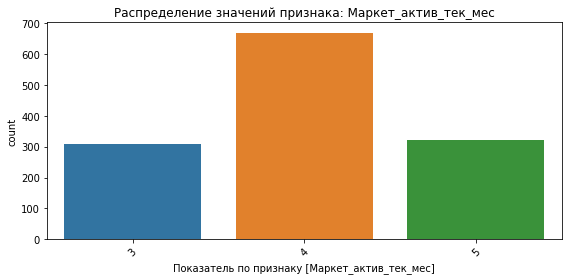

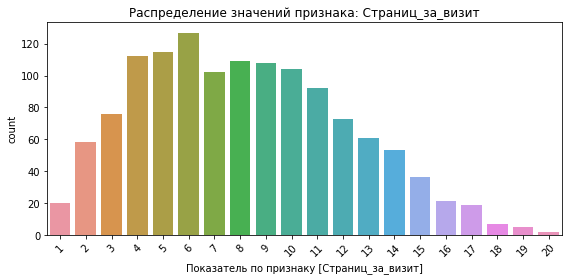

In [20]:
columns_to_plot = [
    'Средний_просмотр_категорий_за_визит',
    'Неоплаченные_продукты_штук_квартал',
    'Ошибка_сервиса',
    'Маркет_актив_тек_мес',
    'Страниц_за_визит'
]

plot_countplots(market_file, columns_to_plot)

<b>Визуализация распределения значений дискретных признаков не выявило аномалий и выбросов. Данные столбцы не требуют правок.</b>

<b>Средний_просмотр_категорий_за_визит</b> показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- В данных не обнаружено аномальных значений.

<b>Неоплаченные_продукты_штук_квартал</b> общее число неоплаченных товаров в корзине за последние 3 месяца.
- Большинство клиентов держат в корзине от 1 до 5 товаров. Выбросов не обнаружено.

<b>Ошибка_сервиса</b> число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца.
- В данных не обнаружено аномальных значений.

<b>Маркет_актив_тек_мес</b> количество маркетинговых коммуникаций в текущем месяце.
- В данных не обнаружено аномальных значений.

<b>Страниц_за_визит</b> среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
- В данных не обнаружено аномальных значений.

In [21]:
def plot_hist_and_box(df, columns, bins=30, figsize=(10, 4)):
    """Строит hist и boxplot для каждого числового признака"""
    for col in columns:
        # Гистограмма
        plt.figure(figsize=figsize)
        plt.hist(df[col], edgecolor='black', bins=bins)
        plt.title(f'Распределение по признаку [{col}]:')
        plt.xlabel(f'Показатель по признаку [{col}]')
        plt.tight_layout()
        plt.show()

        # Boxplot
        plt.figure(figsize=figsize)
        sns.boxplot(x=df[col])
        plt.xlabel(f'Показатель по признаку [{col}]')
        plt.tight_layout()
        plt.show()

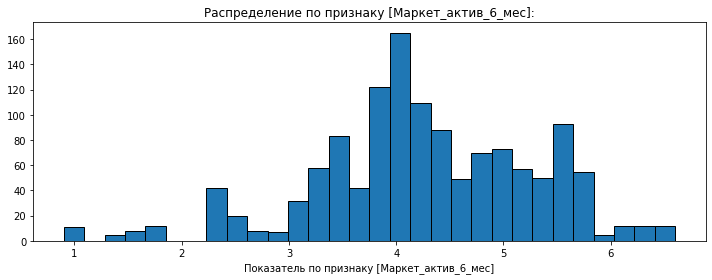

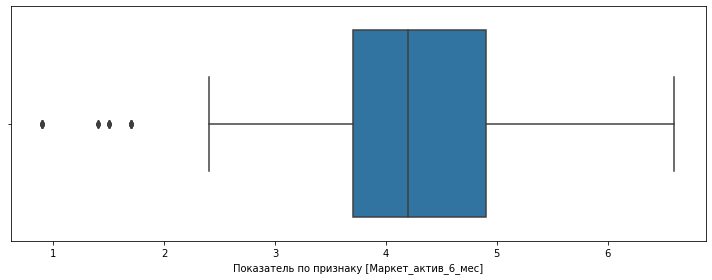

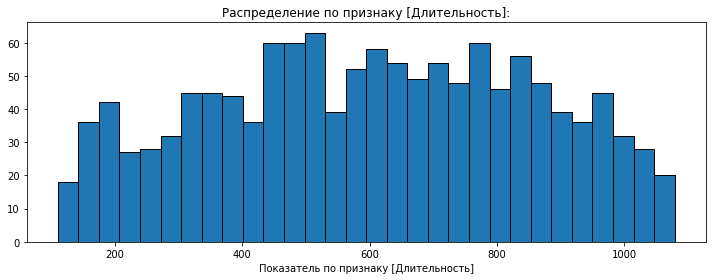

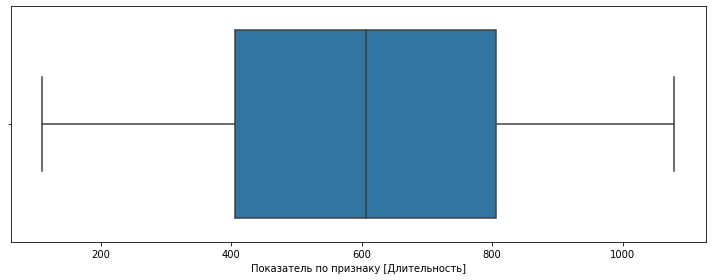

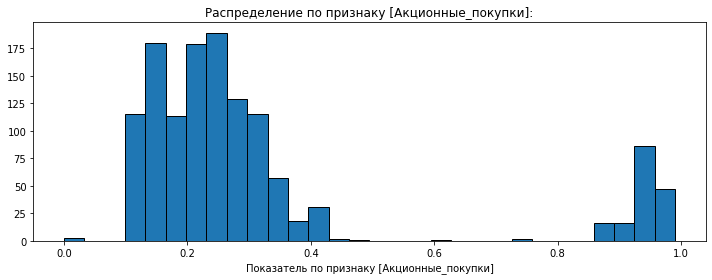

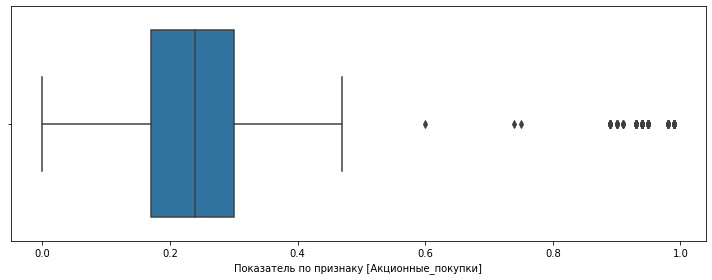

In [22]:
numeric_columns = [
    'Маркет_актив_6_мес',
    'Длительность',
    'Акционные_покупки',
]

plot_hist_and_box(market_file, numeric_columns)


<b>Маркет_актив_6_мес</b> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- не обнаружено каких либо аномальных выбросов или отрицательных значений. значение не требует корректировки.

<b>Длительность</b> — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- не обнаружено каких либо аномальных выбросов или отрицательных значений. значение не требует корректировки.

<b>Акционные_покупки</b> — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- В признаке присутствуют выбросы, но вероятно они являются причиной активности лояльных клиентов, а не результат ошибки при сборе данных. решено оставить данные значения.


<b>Исследовательский анализ категориальных признаков</b>

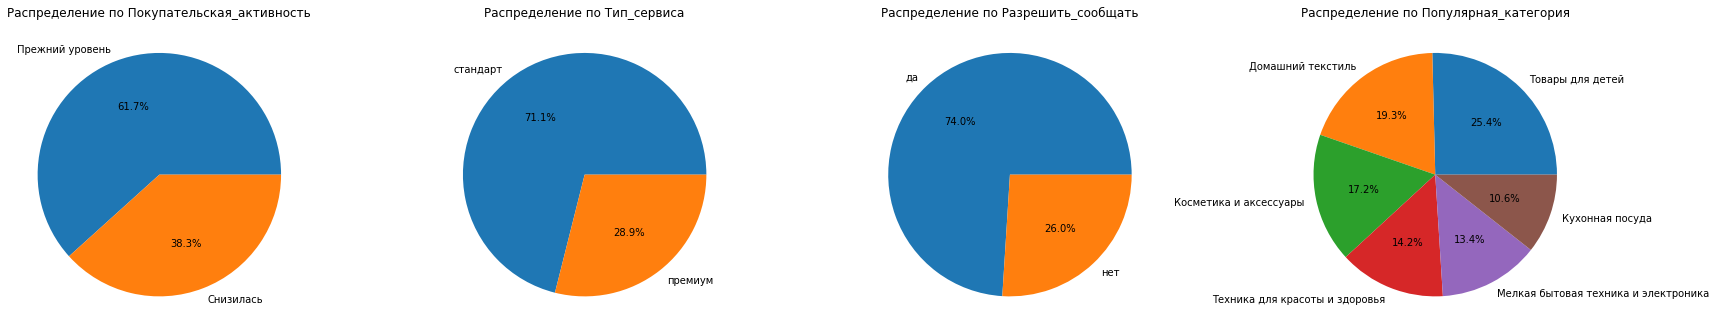

In [23]:
def plot_pie_charts(df, columns, title_prefix='Распределение по'):
    num_cols = len(columns)
    fig, axes = plt.subplots(1, num_cols, figsize=(6 * num_cols, 6))

    if num_cols == 1:
        axes = [axes]

    for ax, col in zip(axes, columns):
        df[col].value_counts().plot.pie(autopct='%.1f%%', ax=ax)
        ax.set_ylabel('')
        ax.set_title(f'{title_prefix} {col}')

    plt.tight_layout()
    plt.show()
    
plot_pie_charts(market_file, [
    'Покупательская_активность',
    'Тип_сервиса',
    'Разрешить_сообщать',
    'Популярная_категория'
])

Визуализация категориальных признаков показало:
- Признак <b>Популярная_категория</b> имеет в основном категории товаров ориентированные на женщин и детей. Вероятно сайт продает в основном женщинам. К сожалению исходные данные не содержат соотношение полов, лишь косвенно можно представить портрет покупателя.

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: Выручка, dtype: float64

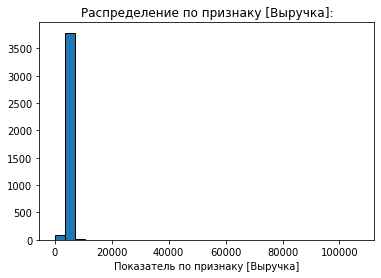

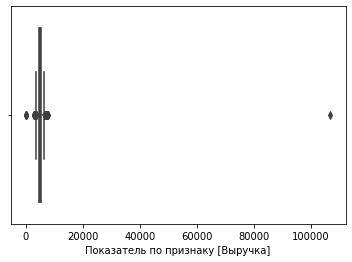

In [24]:
plt.hist(market_money['Выручка'],  edgecolor='black', bins=30)
display(market_money['Выручка'].describe())
plt.title('Распределение по признаку [Выручка]:')
plt.xlabel('Показатель по признаку [Выручка]')
plt.show()

sns.boxplot(x=market_money['Выручка'])
plt.xlabel('Показатель по признаку [Выручка]')
plt.show()

Файл market_money.csv имеет один количественный столбец <b>Выручка</b> в нем зафиксирован выброс со значением 106 тыс. Следует его удалить для корректного обучения.

In [25]:
market_money = market_money.query('Выручка < 100000')
display(market_money['Выручка'].describe())

count    3899.00000
mean     4999.57743
std       706.99988
min         0.00000
25%      4590.10000
50%      4957.00000
75%      5363.00000
max      7799.40000
Name: Выручка, dtype: float64

In [26]:
active_users = market_money.groupby('id').prod().query('Выручка == 0')
active_users.head(10)

,Выручка
id,
215348,0.0
215357,0.0
215359,0.0


In [27]:
market_money = market_money[market_money['Выручка'] != 0]
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893 entries, 1 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3893 non-null   int64  
 1   Период   3893 non-null   object 
 2   Выручка  3893 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.7+ KB


Были удалены строки где выручка за три месяца составило 0, то есть клиенты были не активны. Всего таких строк было три.

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

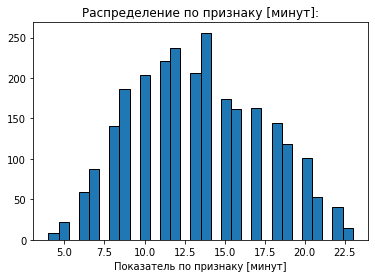

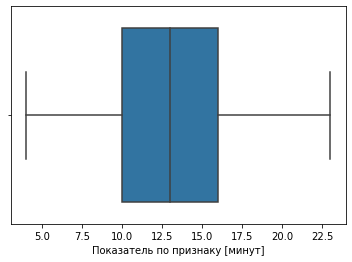

In [28]:
plt.hist(market_time['минут'],  edgecolor='black', bins=30)
display(market_time['минут'].describe())
plt.title('Распределение по признаку [минут]:')
plt.xlabel('Показатель по признаку [минут]')
plt.show()

sns.boxplot(x=market_time['минут'])
plt.xlabel('Показатель по признаку [минут]')
plt.show()

 Признак <b>минут</b> — значение времени, проведённого на сайте, в минутах, не имеет аномальных значений.

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64

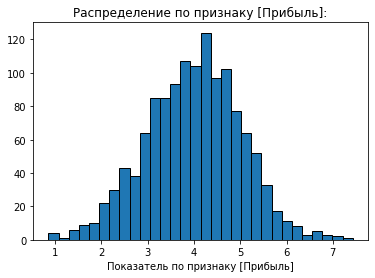

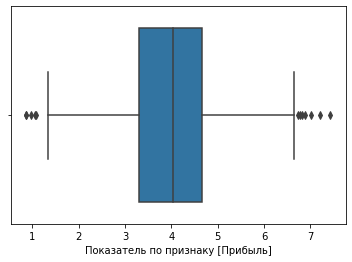

In [29]:
plt.hist(money['Прибыль'],  edgecolor='black', bins=30)
display(money['Прибыль'].describe())
plt.title('Распределение по признаку [Прибыль]:')
plt.xlabel('Показатель по признаку [Прибыль]')
plt.show()

sns.boxplot(x=money['Прибыль'])
plt.xlabel('Показатель по признаку [Прибыль]')
plt.show()

Столбец <b>Прибыль</b>  показывает среднемесячную прибыль продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. Значительных отклонений не замечено, данные распределены равномерно.

<b>Шаг 4. Объединение таблиц</b>
- Объедините таблицы <b>market_file.csv, market_money.csv, market_time.csv.</b>

In [30]:
money_pivot = market_money.pivot(index='id', columns='Период', values='Выручка')
time_pivot = market_time.pivot(index='id', columns='Период', values='минут')
money_pivot.columns = [f'Выручка_{col}' for col in money_pivot.columns]
time_pivot.columns = [f'Минуты_{col}' for col in time_pivot.columns]
merged_df = money_pivot.merge(time_pivot, left_index=True, right_index=True)
merged_df = merged_df.reset_index()
display(merged_df.head())

,id,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,Минуты_предыдущий_месяц,Минуты_текущий_месяц
0,215348,NaN,NaN,3293.1,13,14
1,215349,5216.0,4472.0,4971.6,12,10
2,215350,5457.5,4826.0,5058.4,8,13
3,215351,6158.0,4793.0,6610.4,11,13
4,215352,5807.5,4594.0,5872.5,8,11


In [31]:
market_full_data_set = market_file.merge(merged_df, on='id', how='left')
display(market_full_data_set)

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,Минуты_предыдущий_месяц,Минуты_текущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


Объединенный файл имеет 18 столбцов и 1300 записей.

In [32]:
print(market_full_data_set.isna().sum())

id                                     0
Покупательская_активность              0
Тип_сервиса                            0
Разрешить_сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
Выручка_предыдущий_месяц               3
Выручка_препредыдущий_месяц            3
Выручка_текущий_месяц                  1
Минуты_предыдущий_месяц                0
Минуты_текущий_месяц                   0
dtype: int64


In [33]:
market_full_data_set = market_full_data_set.dropna()
print(market_full_data_set.isna().sum())

id                                     0
Покупательская_активность              0
Тип_сервиса                            0
Разрешить_сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
Выручка_предыдущий_месяц               0
Выручка_препредыдущий_месяц            0
Выручка_текущий_месяц                  0
Минуты_предыдущий_месяц                0
Минуты_текущий_месяц                   0
dtype: int64


In [34]:
display(market_full_data_set)

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,Минуты_предыдущий_месяц,Минуты_текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


<b>Промежуточный вывод</b>
- В процессе был создан единый датасет который объединят в себя все данные со всех трех файлов. 

<b>Шаг 5. Корреляционный анализ</b>

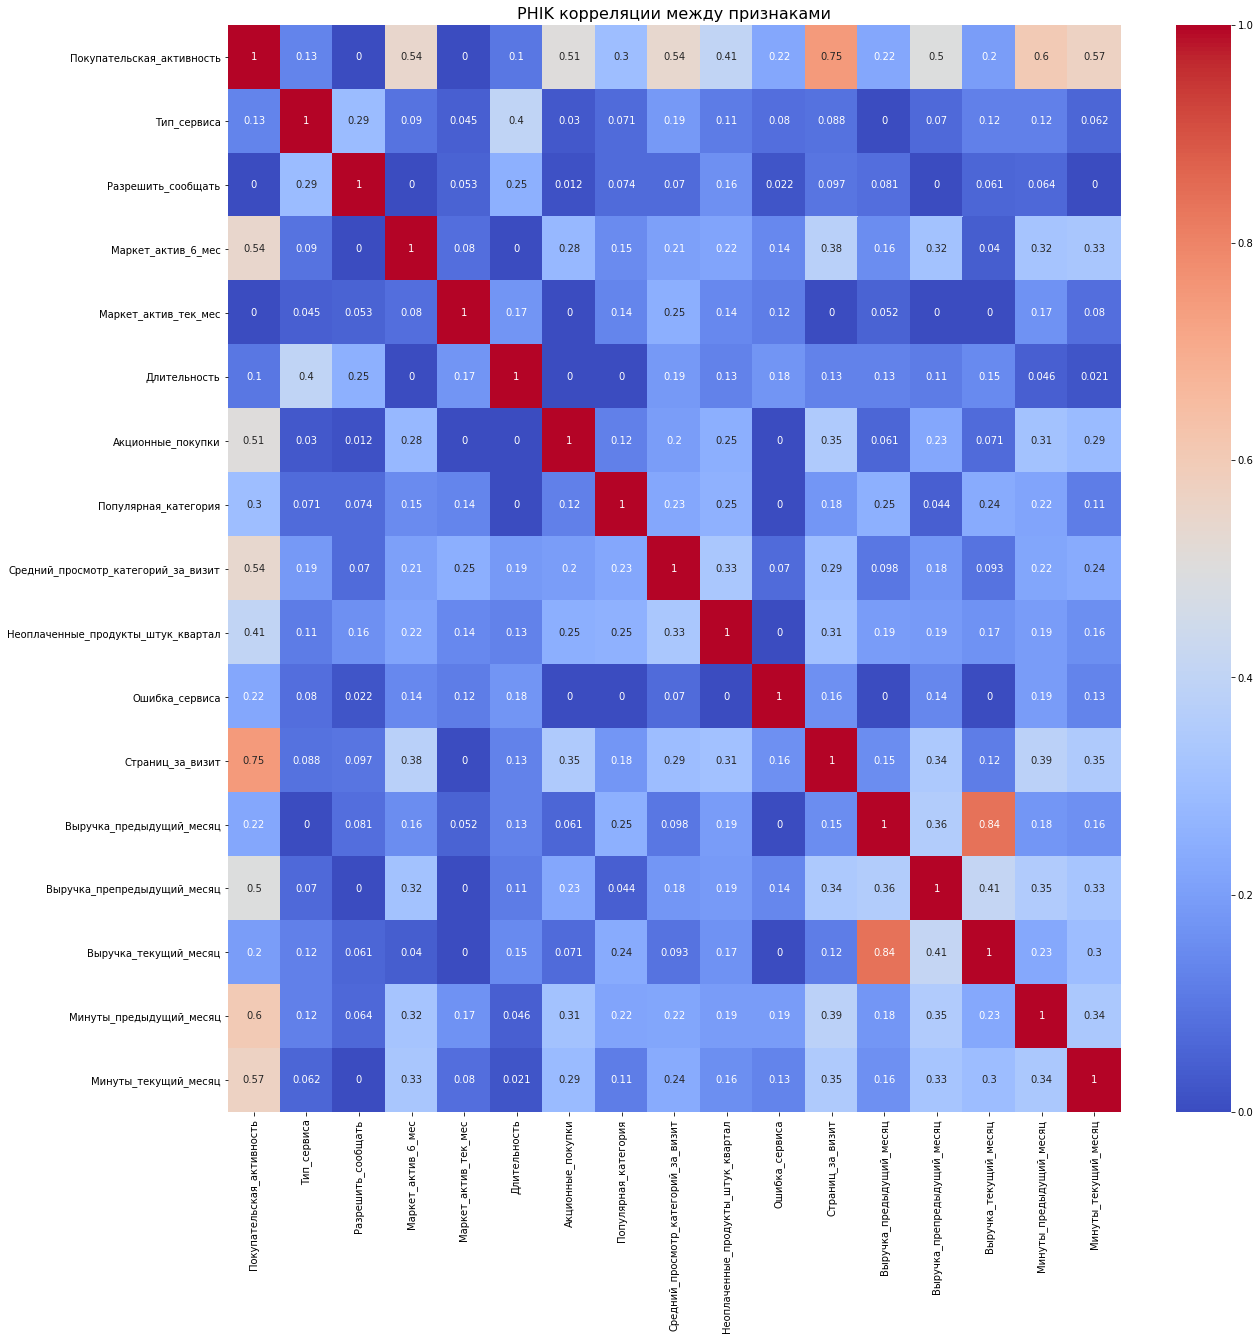

In [35]:
df_no_id = market_full_data_set.drop(columns=['id'])

interval_columns = ['Маркет_актив_6_мес', 'Длительность', 'Акционные_покупки', 
                   'Выручка_предыдущий_месяц', 'Выручка_препредыдущий_месяц', 'Выручка_текущий_месяц']


phik_corr = df_no_id.phik_matrix(interval_cols=interval_columns)

# Визуализация
plt.figure(figsize=(20, 20))
sns.heatmap(phik_corr, annot=True, cmap='coolwarm')
plt.title("PHIK корреляции между признаками", fontsize=16)
plt.show()

Целевой признак <b>Покупательская активность</b> имеет корреляцию с такими признаками как:

'Покупательская_активность', 'Маркет_актив_6_мес', 'Акционные_покупки', 'Популярная_категория','Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
'Страниц_за_визит', 'Выручка_предыдущий_месяц', 'Выручка_препредыдущий_месяц', 'Выручка_текущий_месяц', 'Минуты_предыдущий_месяц', 'Минуты_текущий_месяц'.

Остальные признаки стоит удалить из за ненадобности для МО.

In [36]:
linear_corr = ['Покупательская_активность', 'Маркет_актив_6_мес', 'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'Выручка_предыдущий_месяц', 'Выручка_препредыдущий_месяц', 'Выручка_текущий_месяц',
       'Минуты_предыдущий_месяц', 'Минуты_текущий_месяц']
linear_corr.insert(0, 'id')

In [37]:
market_full_data_set_with_linear_corr = market_full_data_set[linear_corr]
market_full_data_set_with_linear_corr.head()

,id,Покупательская_активность,Маркет_актив_6_мес,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,Минуты_предыдущий_месяц,Минуты_текущий_месяц
1,215349,Снизилась,4.4,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,4.9,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,3.2,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,5.1,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,3.3,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


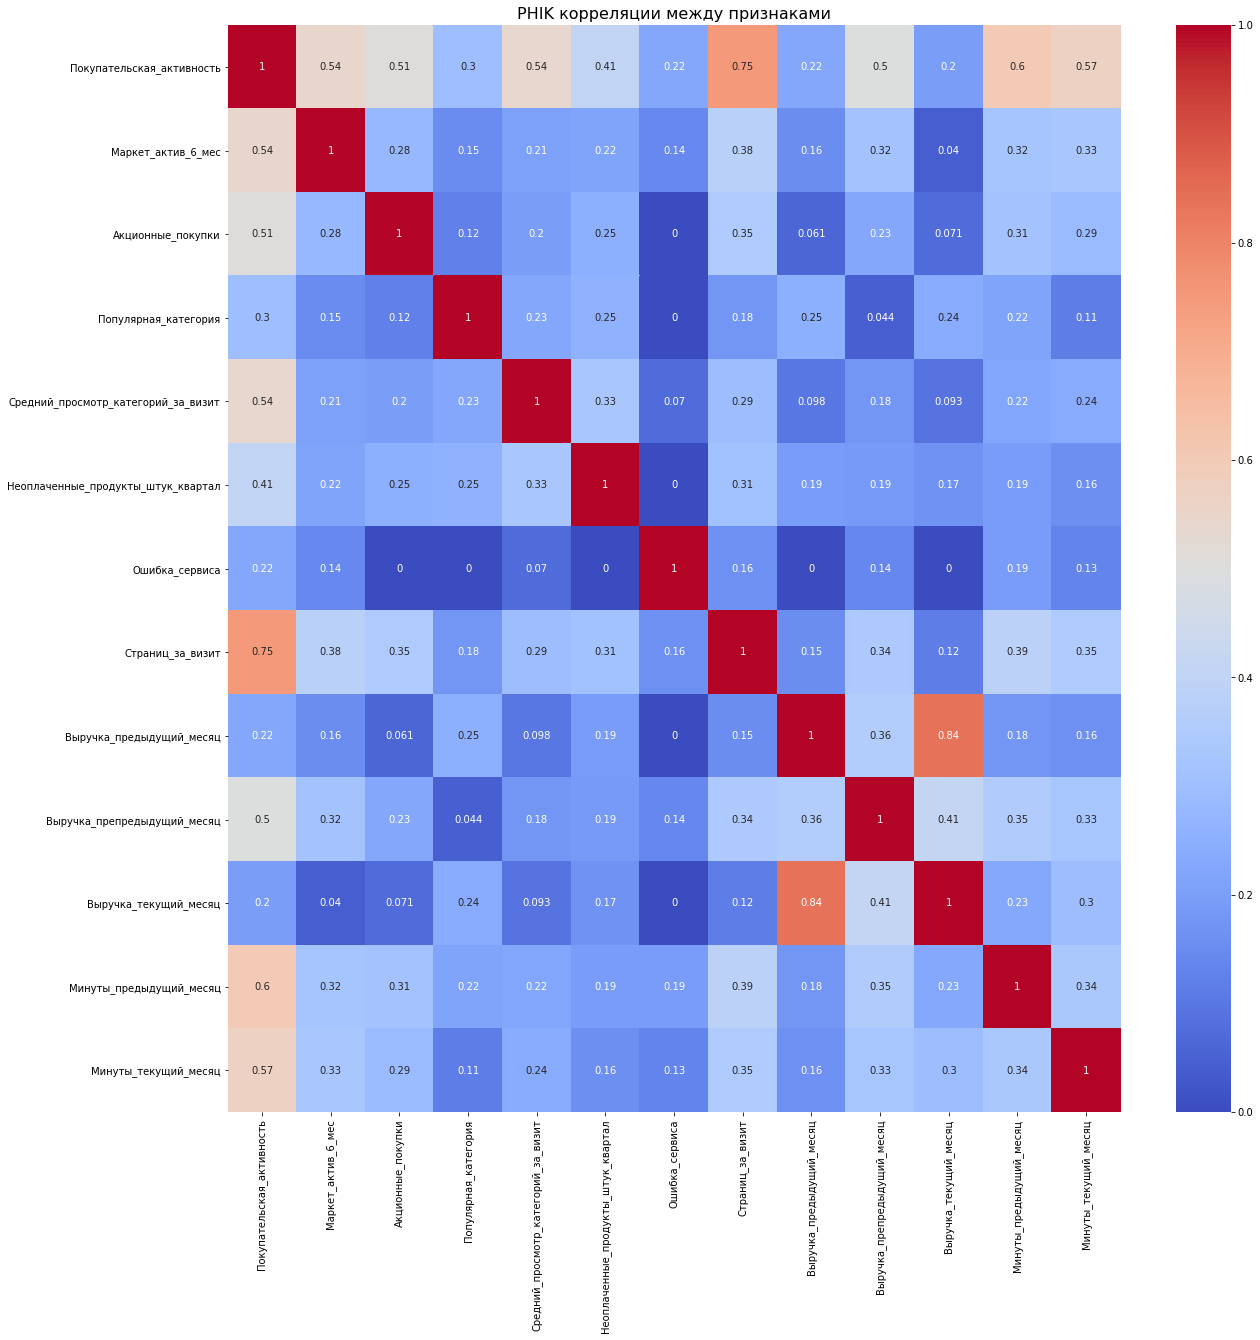

In [38]:
df_no_id = market_full_data_set_with_linear_corr.drop(columns=['id'])

# Задаём список непрерывных переменных
interval_columns = ['Маркет_актив_6_мес', 'Акционные_покупки', 
                   'Выручка_предыдущий_месяц', 'Выручка_препредыдущий_месяц', 'Выручка_текущий_месяц']

# Вычисляем phik-корреляции с указанием непрерывных переменных
phik_corr = df_no_id.phik_matrix(interval_cols=interval_columns)

plt.figure(figsize=(20, 20))
sns.heatmap(phik_corr, annot=True, cmap='coolwarm')
plt.title("PHIK корреляции между признаками", fontsize=16)
plt.show()

<b>Промежуточные выводы</b>

Стоит оставить только самые сильно коррелирующие признаки, там где корреляция выше 0,3%. Такие признаки как [Выручка_текущий_месяц, Минуты_текущий_месяц] являются утечкой информации, данный показатель можно брать в расчет только по окончанию месяца.

Удалим столбцы <b>Ошибка_сервиса, Выручка_предыдущий_месяц, Выручка_текущий_месяц</b>

In [39]:
market_full_data_set_with_linear_corr = market_full_data_set_with_linear_corr.drop(columns=['Ошибка_сервиса', 
                                                                                            'Выручка_предыдущий_месяц', 'Выручка_текущий_месяц', 
                                                                                            'Минуты_текущий_месяц'])
market_full_data_set_with_linear_corr.head()

,id,Покупательская_активность,Маркет_актив_6_мес,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Страниц_за_визит,Выручка_препредыдущий_месяц,Минуты_предыдущий_месяц
1,215349,Снизилась,4.4,0.75,Товары для детей,4,4,5,4472.0,12
2,215350,Снизилась,4.9,0.14,Домашний текстиль,5,2,5,4826.0,8
3,215351,Снизилась,3.2,0.99,Товары для детей,5,0,4,4793.0,11
4,215352,Снизилась,5.1,0.94,Товары для детей,3,2,2,4594.0,8
5,215353,Снизилась,3.3,0.26,Домашний текстиль,4,1,4,5124.0,10


In [40]:
def categorize_unpaid_products(value):
    if value <= 2:
        return 'низкий'
    elif value <= 4:
        return 'средний'
    else:
        return 'высокий'

market_full_data_set_with_linear_corr['Неоплаченные_продукты_штук_квартал_категор'] = market_full_data_set['Неоплаченные_продукты_штук_квартал'].apply(categorize_unpaid_products)
market_full_data_set_with_linear_corr = market_full_data_set_with_linear_corr.drop(columns=['Неоплаченные_продукты_штук_квартал'])

Для оптимизации МО количественный признак <b>Неоплаченные_продукты_штук_квартал</b> был преобразован в категориальный, со значениями низкий, средний, и высокий.

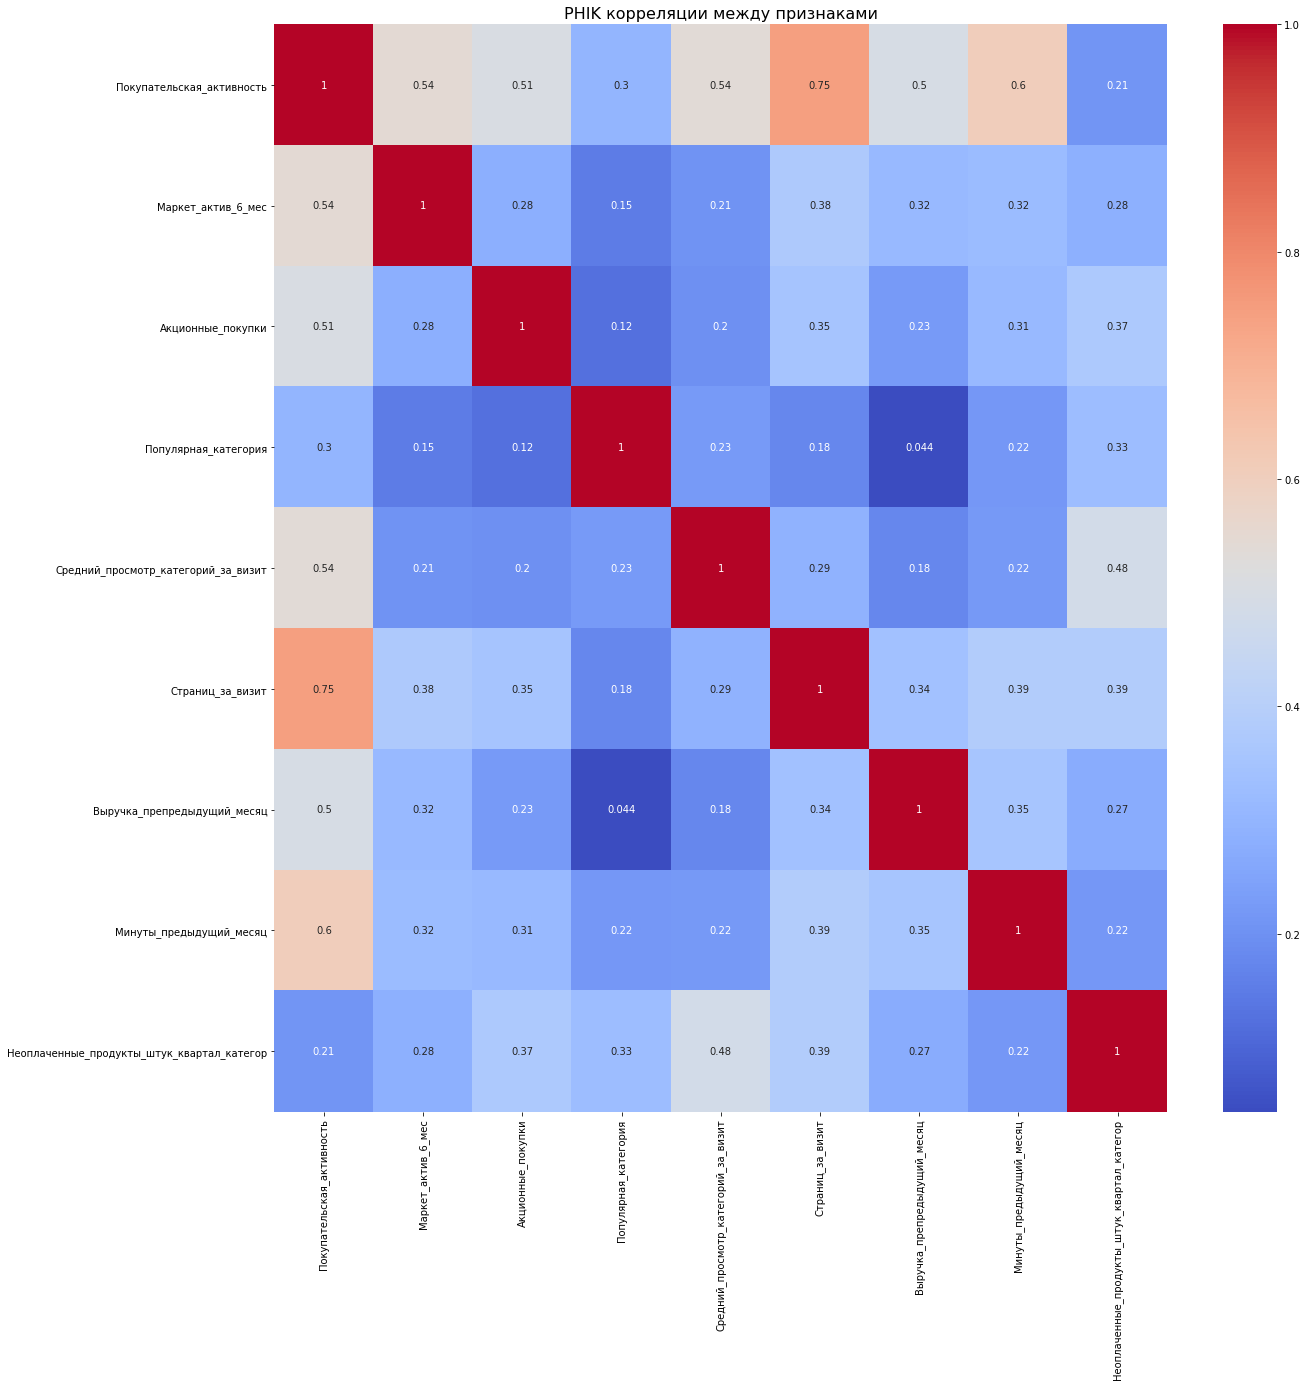

In [41]:
df_no_id = market_full_data_set_with_linear_corr.drop(columns=['id'])

# Задаём список непрерывных переменных
interval_columns = [
    'Маркет_актив_6_мес',
    'Акционные_покупки',
    'Выручка_препредыдущий_месяц',
]

# Вычисляем phik-корреляции с указанием непрерывных переменных
phik_corr = df_no_id.phik_matrix(interval_cols=interval_columns)

# Визуализация
plt.figure(figsize=(20, 20))
sns.heatmap(phik_corr, annot=True, cmap='coolwarm')
plt.title("PHIK корреляции между признаками", fontsize=16)
plt.show()

<b>Вывод по корреляционному анализу</b>
- Был проведен анализ корреляции с целевым признаком (Покупательская активность). Удалены признаки со слабой корреляцией, и признаки - учетка информации.

<b>Шаг 6. Использование пайплайнов</b>

In [42]:
RANDOM_STATE = 42
TEST_SIZE = 0.25
X_train, X_test, y_train, y_test = train_test_split(
    market_full_data_set_with_linear_corr.drop(['id', 'Покупательская_активность'], axis=1),
    market_full_data_set_with_linear_corr['Покупательская_активность'],
    stratify=market_full_data_set_with_linear_corr['Покупательская_активность'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((972, 8), (324, 8))

Разделение данный на тренировочную и тестовую выборку.

In [43]:
ohe_columns = ['Популярная_категория']
ord_columns = ['Неоплаченные_продукты_штук_квартал_категор']
num_columns = ['Маркет_актив_6_мес', 'Акционные_покупки', 
               'Средний_просмотр_категорий_за_визит', 'Страниц_за_визит', 
               'Выручка_препредыдущий_месяц', 'Минуты_предыдущий_месяц']

Данные были разделены для масштабирования и кодирования признаков.

In [44]:
# Пайплайн для количественных признаков: два скейлера
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Пайплайн для категориальных (OneHot)
ohe_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

In [45]:
# Пайплайн для порядковых признаков
ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [46]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_columns),
    ('ohe', ohe_pipeline, ohe_columns),
    ('ord', ordinal_pipeline, ord_columns)
])

In [47]:
f1_custom = make_scorer(f1_score, pos_label='Снизилась')

def train_and_evaluate(model, param_grid, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring=f1_custom, n_jobs=-1)
    grid.fit(X_train, y_train)

    return {
        'name': model_name,
        'model': grid,
        'best_score': grid.best_score_
    }

results = []


results.append(train_and_evaluate(KNeighborsClassifier(), {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance']
}, "KNN"))

results.append(train_and_evaluate(DecisionTreeClassifier(), {
    'classifier__max_depth': [3, 5, 7, 10]
}, "Decision Tree"))

results.append(train_and_evaluate(LogisticRegression(max_iter=1000), {
    'classifier__C': [0.1, 1, 10]
}, "Logistic Regression"))

results.append(train_and_evaluate(SVC(), {
    'classifier__C': [0.1, 1],
    'classifier__kernel': ['linear', 'rbf']
}, "SVC"))

best_result = max(results, key=lambda x: x['best_score'])
best_model = best_result['model']
model_name = best_result['name']

y_pred = best_model.predict(X_test)

print(f"Лучшая модель: {model_name}")
print(f"Best CV score: {best_result['best_score']:.4f}")
print(f"Test F1 score ('Снизилась'): {f1_score(y_test, y_pred, pos_label='Снизилась'):.4f}")
print(classification_report(y_test, y_pred, target_names=['Снизилась', 'Не снизилась']))

Лучшая модель: KNN
Best CV score: 0.8127
Test F1 score ('Снизилась'): 0.8536
              precision    recall  f1-score   support

   Снизилась       0.90      0.93      0.91       201
Не снизилась       0.88      0.83      0.85       123

    accuracy                           0.89       324
   macro avg       0.89      0.88      0.88       324
weighted avg       0.89      0.89      0.89       324



<b>Обоснование</b>
- Цель модели — предсказать клиентов, чья покупательская активность снизится, чтобы с ними можно было вовремя провести маркетинговые действия и предотвратить отток.

- В этой задаче критично не пропустить клиентов, которые действительно снизят активность. Поэтому на первый взгляд логично использовать recall — метрику, измеряющую долю правильно выявленных случаев "Снизилась".

- Однако, если ориентироваться только на recall, модель может начинать чрезмерно часто предсказывать "Снизилась", снижая точность и создавая много ложных срабатываний, что увеличивает затраты бизнеса на нецелевые акции. Поэтому нужен баланс между точностью (precision) и полнотой (recall).

- Именно поэтому в проекте выбрана метрика F1-score, которая учитывает и полноту, и точность. Это позволяет выявлять как можно больше клиентов с реальным снижением активности, но при этом не перегружать маркетинг ложными срабатываниями.

<b>Метрика F1-score выбрана, потому что она обеспечивает баланс между точностью (precision) и полнотой (recall). В рамках задачи важно как можно точнее выявить клиентов, чья активность снизится, чтобы своевременно среагировать и предотвратить отток. При этом чрезмерное количество ложных срабатываний (низкая точность) может привести к избыточным затратам на неэффективные маркетинговые действия. Таким образом, F1-score позволяет одновременно контролировать обе стороны ошибки и подходит для оценки качества модели в условиях несбалансированного класса и важности обеих ошибок.</b>


In [48]:
dummy = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='most_frequent'))
])
dummy.fit(X_train, y_train)

y_dummy_pred = dummy.predict(X_test)
dummy_f1 = f1_score(y_test, y_dummy_pred, pos_label='Снизилась')
print(f"DummyClassifier F1 (most_frequent): {dummy_f1:.4f}")

DummyClassifier F1 (most_frequent): 0.0000


Отличный показатель, значит обученная модель KNN действительна уловила связь между признаками.

In [49]:
best_pipeline = best_result['model'].best_estimator_
print(best_pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Маркет_актив_6_мес',
                                                   'Акционные_покупки',
                                                   'Средний_просмотр_категорий_за_визит',
                                                   'Страниц_за_визит',
                                                   'Выручка_препредыдущий_месяц',
                                                   'Минуты_предыдущий_месяц']),
                                                 ('ohe',
                                                  Pipelin

Гиперпараметры модели показазывающая лучший результат.

In [50]:
preprocessor = best_pipeline['preprocessor']
X_train_preprocessed = preprocessor.transform(X_train)

In [51]:
model = KNeighborsClassifier(n_neighbors=7, weights='distance')
model.fit(X_train_preprocessed, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [52]:
features_names = (
    list(preprocessor['ohe'].get_feature_names_out())
    + list(preprocessor['ord'].get_feature_names_out())
    + list(preprocessor['num'].get_feature_names_out(num_columns))
)

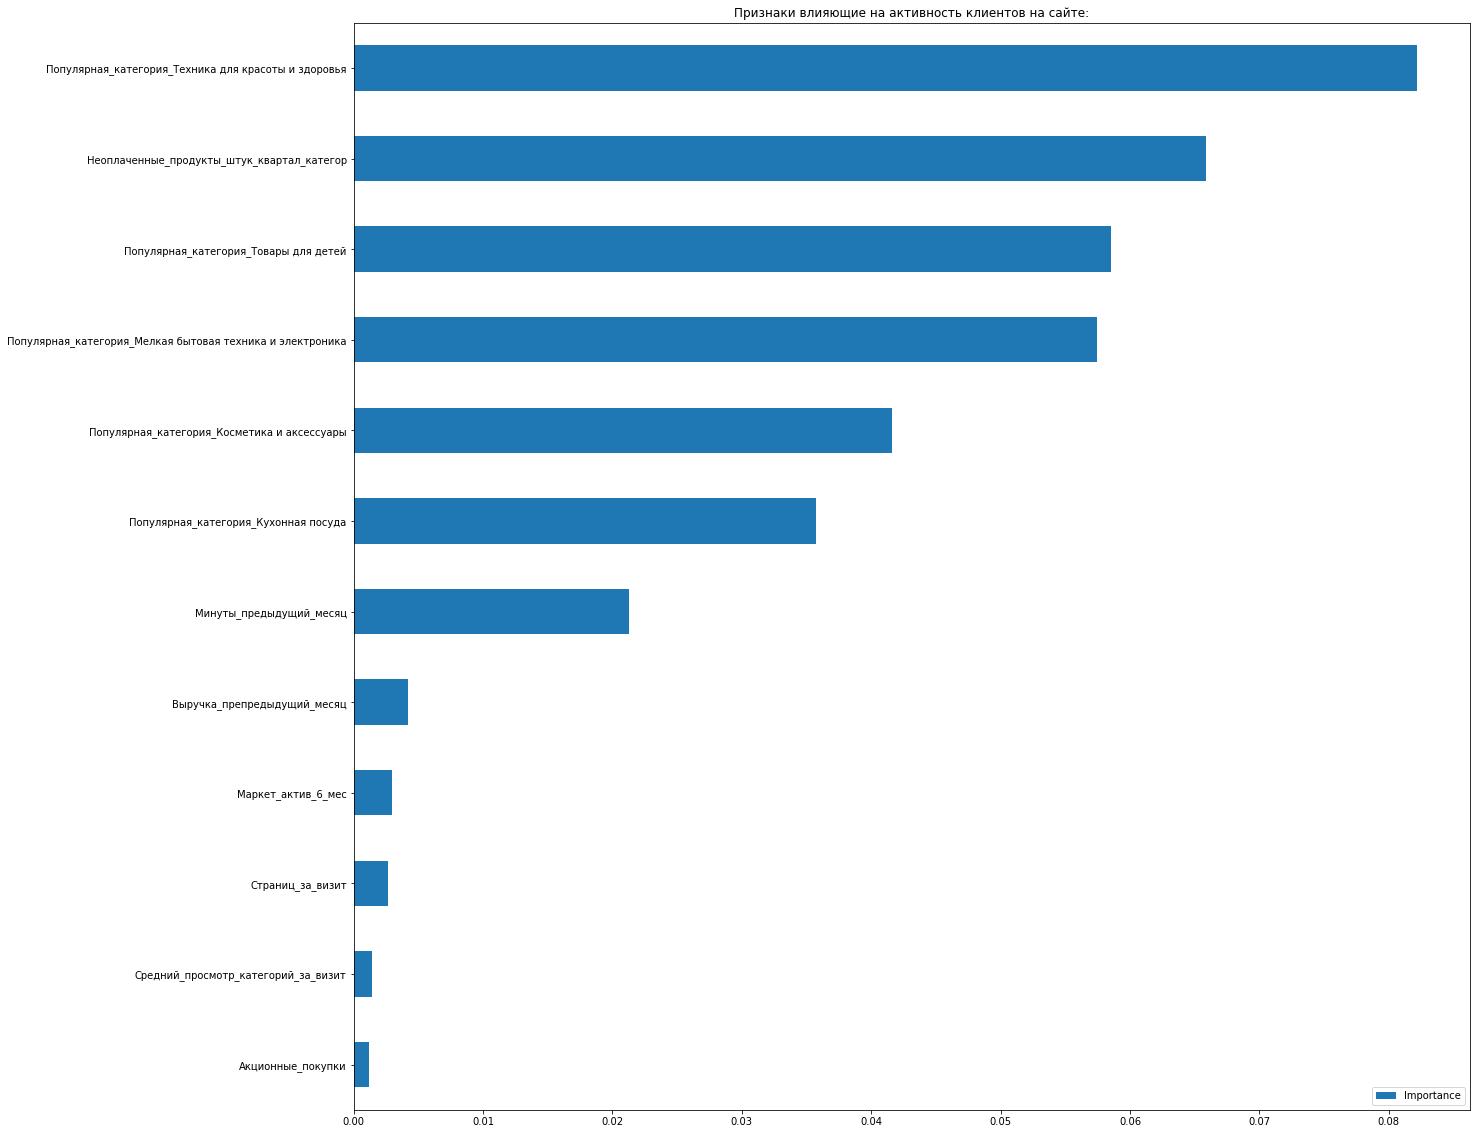

In [53]:
result = permutation_importance(model, X_train_preprocessed, y_train, scoring='roc_auc')

feature_importance = pd.DataFrame({'Feature': features_names, 'Importance': np.abs(result['importances_mean'])})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(20, 20), ylabel='', xlabel='')

plt.title('Признаки влияющие на активность клиентов на сайте:')
plt.show()

Гистограмма показывает признаки значительно влияющие на активноть покупателей, данный факт поможет предприятию на проведение акций и скидок на товары в соответствующие разделе интернет магазина.

- Популярным разделом у покупаетелей является раздел мелкая бытовая техника, техника для красоты и здоровья.
- Раздел неоплаченные продукты квартал (корзина).
- Раздел товары для детей.

In [54]:
data = pd.DataFrame(X_train_preprocessed, columns=features_names)
background = shap.sample(data, 100)
explainer = shap.KernelExplainer(model.predict_proba, background)
shap_values = explainer(X_train_preprocessed)

  0%|          | 0/972 [00:00<?, ?it/s]

  0%|          | 0/972 [00:00<?, ?it/s]

<Figure size 1440x432 with 0 Axes>

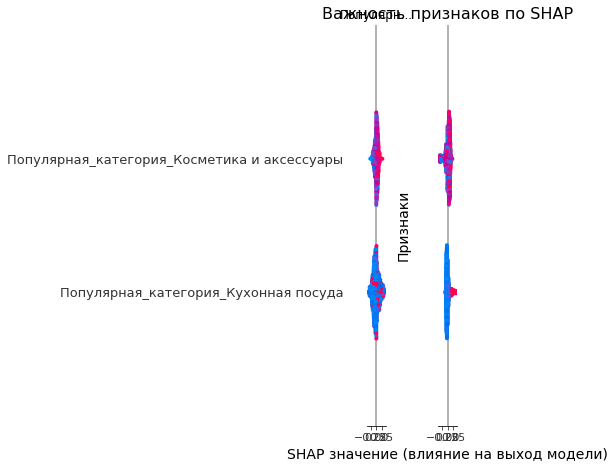

In [55]:
if version.parse(shap.__version__) >= version.parse("0.41.0"):
    shap_values = explainer(X_train_preprocessed)
    plt.figure(figsize=(20, 6))
    shap.summary_plot(
        shap_values, X_train_preprocessed, feature_names=features_names, show=False
    )
else:
    shap_values = explainer.shap_values(X_train_preprocessed)
    plt.figure(figsize=(20, 6))
    shap.summary_plot(
        shap_values, X_train_preprocessed, feature_names=features_names, show=False
    )

plt.title("Важность признаков по SHAP", fontsize=16)
plt.ylabel("Признаки", fontsize=14)
plt.xlabel("SHAP значение (влияние на выход модели)", fontsize=14)
plt.tight_layout()
plt.show()

1) Наиболее важные признаки вляиющие на активность клиентов:

- Популярная_категория_Техника для красоты и здоровья

- Неоплаченные_продукты_штук_квартал_категор

- Мелкая бытовая техника и электроника

- Кухонная посуда

- Товары для детей

<b>Шаг 8. Сегментация покупателей</b>

In [56]:
market_full_data_set= market_full_data_set_with_linear_corr.merge(money, on='id')
print(market_full_data_set.shape)
market_full_data_set.head(5)

(1296, 11)


,id,Покупательская_активность,Маркет_актив_6_мес,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Страниц_за_визит,Выручка_препредыдущий_месяц,Минуты_предыдущий_месяц,Неоплаченные_продукты_штук_квартал_категор,Прибыль
0,215349,Снизилась,4.4,0.75,Товары для детей,4,5,4472.0,12,средний,4.16
1,215350,Снизилась,4.9,0.14,Домашний текстиль,5,5,4826.0,8,низкий,3.13
2,215351,Снизилась,3.2,0.99,Товары для детей,5,4,4793.0,11,низкий,4.87
3,215352,Снизилась,5.1,0.94,Товары для детей,3,2,4594.0,8,низкий,4.21
4,215353,Снизилась,3.3,0.26,Домашний текстиль,4,4,5124.0,10,низкий,3.95


interval columns not set, guessing: ['Маркет_актив_6_мес', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Страниц_за_визит', 'Выручка_препредыдущий_месяц', 'Минуты_предыдущий_месяц', 'Прибыль']


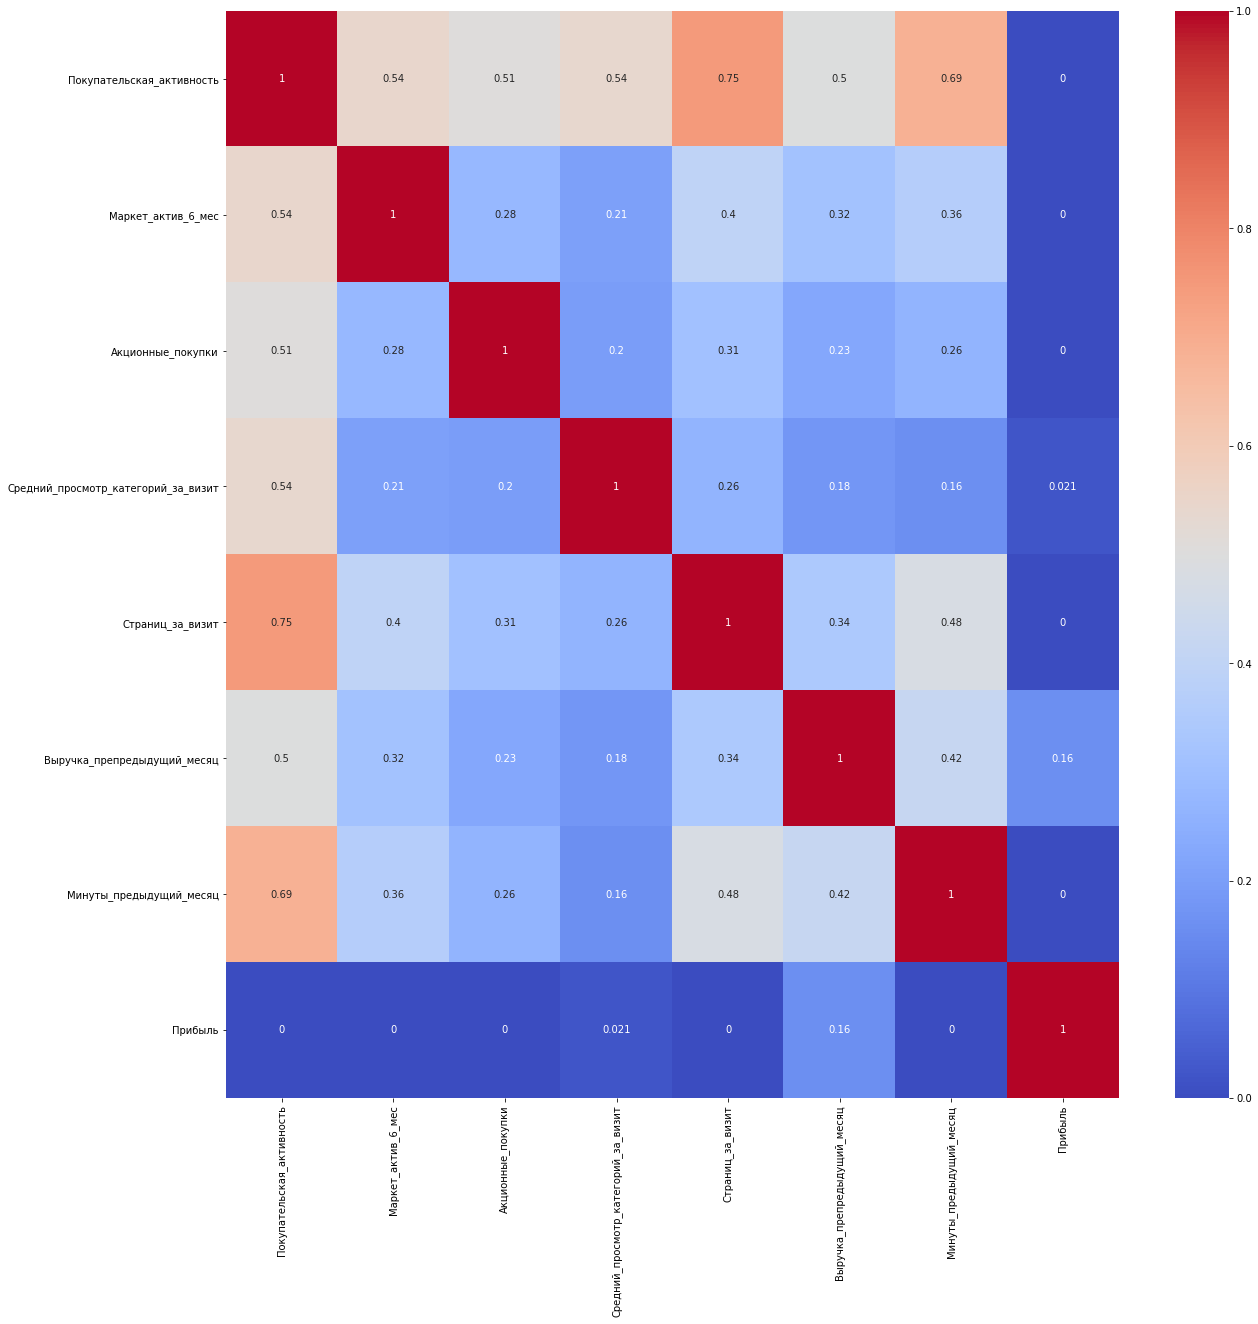

In [57]:
df_no_id = market_full_data_set.drop(columns=['id', 'Популярная_категория', 'Неоплаченные_продукты_штук_квартал_категор'])
phik_corr = df_no_id.phik_matrix()
plt.figure(figsize=(20, 20))
sns.heatmap(phik_corr, annot=True, cmap='coolwarm')
plt.show()

Не обнаружено корреляции с признака "прибыль" с другими признаками. Разве что "Выручка предыдущий месяц" незначительно коррелирует с данным признаком.

In [58]:
series = best_model.predict_proba(
    market_full_data_set.drop(
        ['Прибыль', 'id', 'Покупательская_активность'], axis=1
    )
)[:,1]

market_full_data_set['снижения_активности_прогноз'] = series

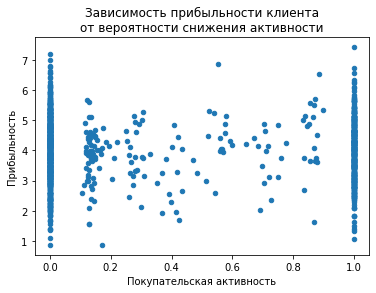

In [59]:
market_full_data_set.plot.scatter(x='снижения_активности_прогноз',
                       y='Прибыль',
                       title='Зависимость прибыльности клиента\nот вероятности снижения активности',
                       xlabel='Покупательская активность',
                       ylabel='Прибыльность')
plt.show()

- Стоит разделить клиентов на две группы в зависимости от вероятности снижения активности.

In [62]:
low_activity = market_full_data_set[(market_full_data_set['снижения_активности_прогноз'] <= 0.5) 
                                    & (market_full_data_set['Прибыль']>=3)]
same_activity = market_full_data_set[~((market_full_data_set['снижения_активности_прогноз'] >= 0.5)
                                       & (market_full_data_set['Прибыль']>=3))]

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Страниц_за_визит', 'Выручка_препредыдущий_месяц', 'Минуты_предыдущий_месяц', 'Прибыль']


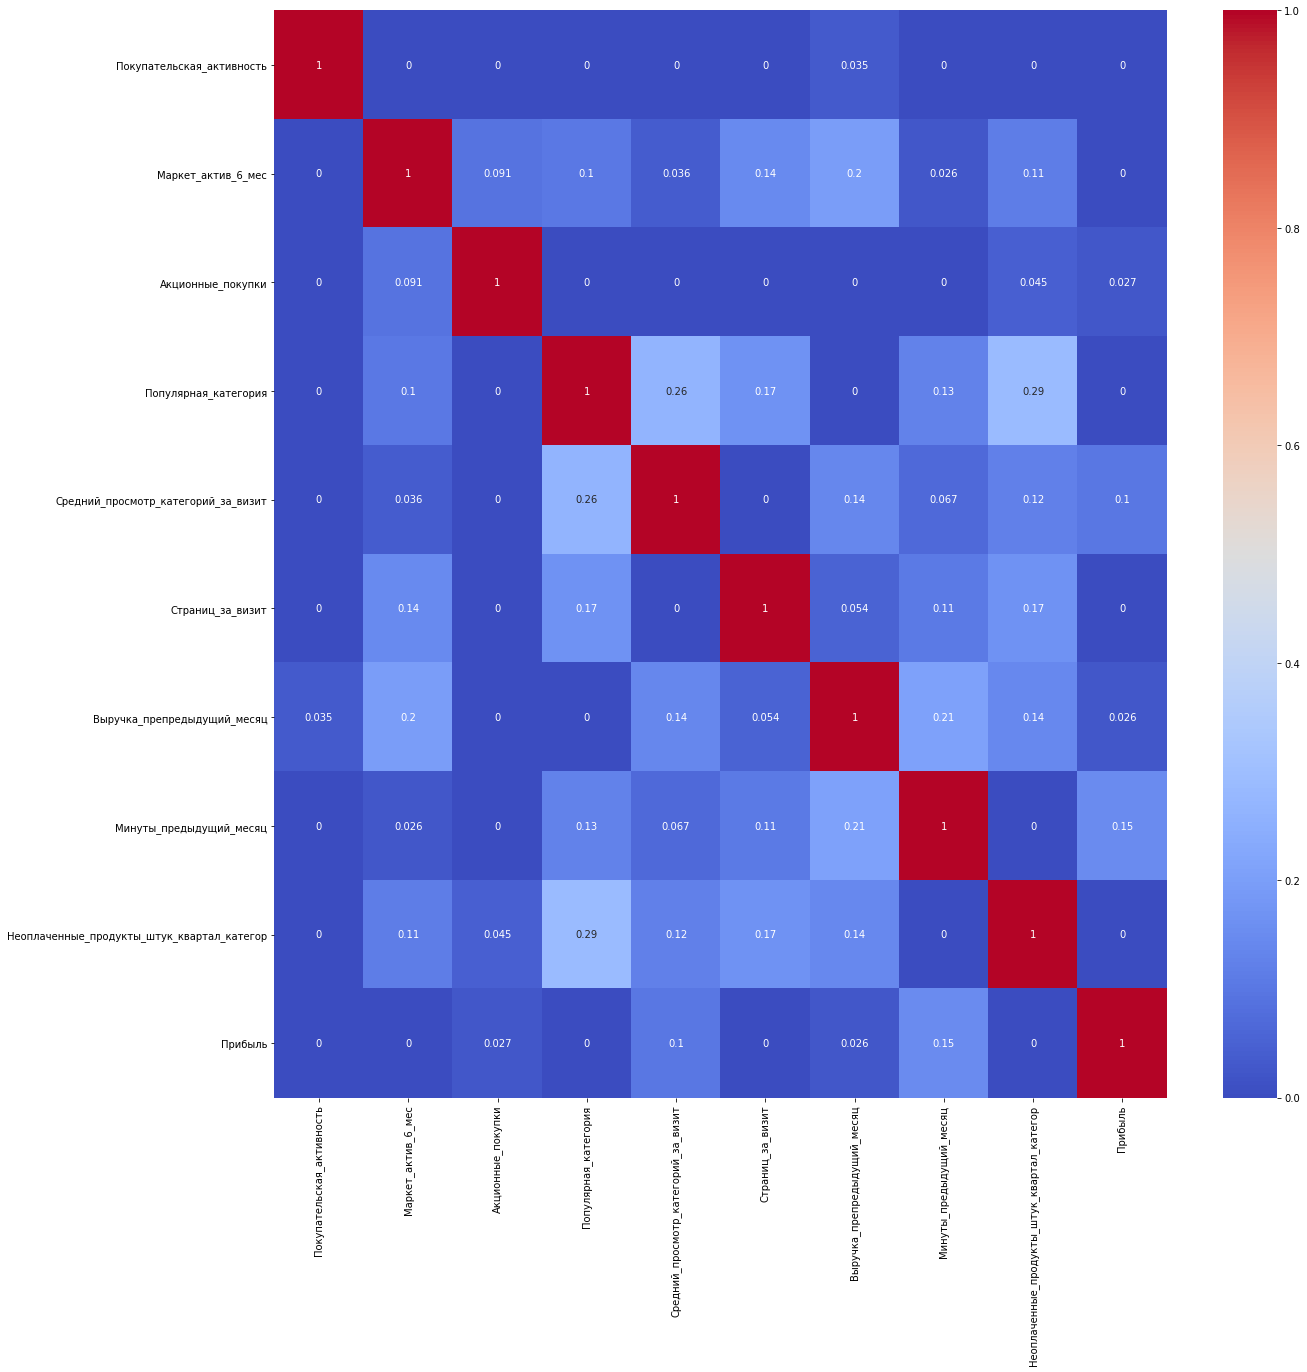

In [67]:
df_no_id = low_activity.drop(columns=['id', 'снижения_активности_прогноз'])
phik_corr = df_no_id.phik_matrix()
plt.figure(figsize=(20, 20))
sns.heatmap(phik_corr, annot=True, cmap='coolwarm')
plt.show()

Что бы повысить активность клиентов с высоким риском снижения покупок следует сфокусировать внимание на такие признаки как:
- Акционные_покупки
- Популярная_категория
- Средний_просмотр_категорий_за_визит
- Страниц_за_визит
 Данные признаки в значительной степени влияют на покупательскую активность клиентов.

<b>Итоговый вывод</b>

- Был проведен анализ исследовательский анализ данных полученных от интернет магазина «В один клик». Были удалены аномальные значения, выбросы и дубликаты.
- Была проведена процедура объединения данных по столбцу ID
- По всем признакам был выведена корреляционная матрица признаков. Устранены признаки которые могут являтся результатом утечки данных [Выручка_текущий_месяц, Минуты_текущий_месяц].

- Был разработан пайплан с 4 моделями для предсказания активности клиентов LogisticRegression, KNeighborsClassifier, SVC, DecisionTreeClassifier.
- Лучшей моделью оказался KNeighborsClassifier с гиперпараметрами Best Params: (n_neighbors=7, weights='distance'), точность составило при кросс валидации - Best CV score: 0.8127, Test F1 score ('Снизилась'): 0.8536
- целевой признак был не сбалансированным, поэтому в качестве метрики был выбран кастомная метрика f1 с фокусом на признак "Снизилось".

- При помощи лучшей модели была спрогнозирована активность клиентов на сайте, клиенты были разделены на две группы, те у кого покупательская активность вероятно понизится, и те у кого активность останется на прежнем уровне.
- Были установлены признаки значительно влияющие на покупательскую активность клиентов входящую в группу клиентов  чья активность на сайте вероятно понизится.

<b>Рекомендации</b>
- Для повыщения покупательской активности клиентов стоит проводить акции в популярных категориях, так как данный признак в значительной степени влияет на активность.

- Установлено что некоторые разделы сайта очень популярны например:


- Популярная_категория_Техника для красоты и здоровья
- Неоплаченные_продукты_штук_квартал_категор
- Мелкая бытовая техника и электроника
- Кухонная посуда
- Товары для детей


- Отделу маркетинга стоит уделить внимания на товары которые продаются в данном разделе и разработать акции для удержания покупательской активности на высоком уровне. 
- Также установлено что часть клиентов переводят товары в корзину но не оплачивают ее, следовательно стоит разработать механизм мотивирующий произвести оплату (сгорающая скидка итп).